# Importing the covid dataset and manipulating it to derive the state of Massachusetts and perform linear and non-linear regressions.

In [2]:
import pandas as pd 
import numpy as np


#imported the original dataset which included all the states 

data = pd.read_csv(r"C:\Users\mawul\Downloads\ProjectDataStage1.csv")




In [3]:
#dropping the out of range dates

columns_to_drop = [col for col in data.columns if (('2020-01-22' <= col <= '2020-06-01') or ('2021-01-03' <= col)) and
                                                  (('Cases' in col) or ('Deaths' in col))]


data.drop(columns=columns_to_drop, inplace=True)

In [4]:
#filtered the cleaned data to access only the state of Massachussets 
data[data['State'].str.contains('MA')]



filtered_data =data[data['State'].str.contains('MA')]

filtered_data.head()

,Unnamed: 0,countyFIPS,County Name,State,population,2020-06-01_Cases,2020-06-02_Cases,2020-06-03_Cases,2020-06-04_Cases,2020-06-05_Cases,...,2020-12-24_Deaths,2020-12-25_Deaths,2020-12-26_Deaths,2020-12-27_Deaths,2020-12-28_Deaths,2020-12-29_Deaths,2020-12-30_Deaths,2020-12-31_Deaths,2021-01-01_Deaths,2021-01-02_Deaths
1239,1239,0,Statewide Unallocated,MA,0,1424,1430,1435,1443,1446,...,226,217,217,217,220,229,234,238,238,240
1240,1240,25001,Barnstable County,MA,212990,566,566,566,568,571,...,125,119,119,119,120,132,136,138,138,138
1241,1241,25003,Berkshire County,MA,124944,7348,7380,7453,7508,7573,...,1016,995,995,995,1000,1047,1059,1071,1071,1079
1242,1242,25005,Bristol County,MA,565217,40,41,41,41,42,...,0,0,0,0,0,0,0,0,0,0
1243,1243,25007,Dukes County,MA,17332,14721,14795,14857,14969,15064,...,1625,1586,1586,1586,1595,1666,1683,1698,1698,1713


In [18]:
# The date range of 2020-06-01 to 2021-01-03. 
col_list = [j for j in filtered_data.columns if (
    ('2020-01-22' <= j < '2020-06-01') or ('2021-01-04' <= j)) 
    and (('Cases' in j) or ('Deaths' in j))]


# split the cases and deaths data into two  dataframes
cases_data = filtered_data.filter(like='Cases', axis=1)
deaths_data = filtered_data.filter(like='Deaths', axis=1)

# Suming the populations column to get total population in massachusetts.
MApop =filtered_data.population.sum()

# Sums all cases and deaths columns to get their totals in massachusetts
caseMA_total = cases_data.sum(axis=0).to_frame().T
deathMA_total = deaths_data.sum(axis=0).to_frame().T

In [19]:
# Convert the cases dataframe to numPy array
cases_array = caseMA_total.to_numpy()
cases_array1 = cases_array[:, 1:] - cases_array[:, :-1]

first_column = cases_array[:, 0].reshape(-1, 1)
cases_array1 = np.hstack((first_column, cases_array1))
cases_array1[0, 0] = 20743

In [20]:
# convert the numpy array into a dataframe and manipulating it.
casesMA_df = pd.DataFrame(cases_array1.T, columns=['Cases'])

# Adding a new column which shows the number of days.

casesMA_df['Num_of_Days'] = casesMA_df.index + 1

# normalizing the data
casesMA_df['Cases'] = (casesMA_df.Cases/MApop)*100000
casesMA_df.head()

,Cases,Num_of_Days
0,300.950177,1
1,6.151611,2
2,6.572358,3
3,6.848020,4
4,8.792162,5


In [22]:
#repeat same manipulations  for deaths dataframe
death_array = deathMA_total.to_numpy()

death_array1 = death_array[:, 1:] - death_array[:, :-1]
first_column = death_array[:, 0].reshape(-1, 1)
death_array1 = np.hstack((first_column, death_array1))
death_array1[0, 0] = 734

deaths_MA = pd.DataFrame(death_array1.T, columns=['Deaths'])

deaths_MA['Num_of_Days'] = deaths_MA.index + 1

deaths_MA['Deaths'] = (deaths_MA.Deaths/MApop)*10000000
deaths_MA.head()

,Deaths,Num_of_Days
0,1064.925180,1
1,76.895142,2
2,97.207067,3
3,73.993439,4
4,53.681515,5


# Linear and non-linear regressions for cases

In [24]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.svm import SVR

# Set the x and y values for the models.
# x is the  number of days.
# y is the number of new cases/deaths.
x_cases = np.array(casesMA_df.Num_of_Days).reshape(-1, 1)
y_cases = np.array(casesMA_df.Cases).reshape(-1, 1)

In [25]:
# setting up the training and testing variables based on the  x and y values.
x_train,x_test,y_train,y_test=train_test_split(x_cases, y_cases, test_size=0.3, random_state=42)

In [32]:
#SVR training for linear model.
svr_lin = SVR(kernel="linear")
svr_lin.fit(x_train, y_train.ravel())

#SVR training for non-linear model.

svr_poly1 = SVR(kernel="poly", degree=1)
svr_poly2 = SVR(kernel="poly", degree=2)
svr_poly3 = SVR(kernel="poly", degree=3)
svr_poly4 = SVR(kernel="poly", degree=4)

# Training the non-linear model.
svr_poly1.fit(x_train, y_train.ravel())
svr_poly2.fit(x_train, y_train.ravel())
svr_poly3.fit(x_train, y_train.ravel())
svr_poly4.fit(x_train, y_train.ravel())

SVR(degree=4, kernel='poly')

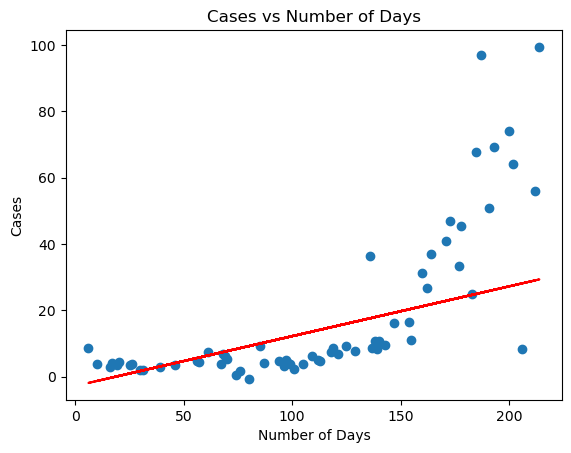

In [33]:

import matplotlib.pyplot as plt

y_pred = svr_lin.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'red')
plt.title('Cases vs Number of Days')
plt.xlabel('Number of Days')
plt.ylabel('Cases')
plt.show()

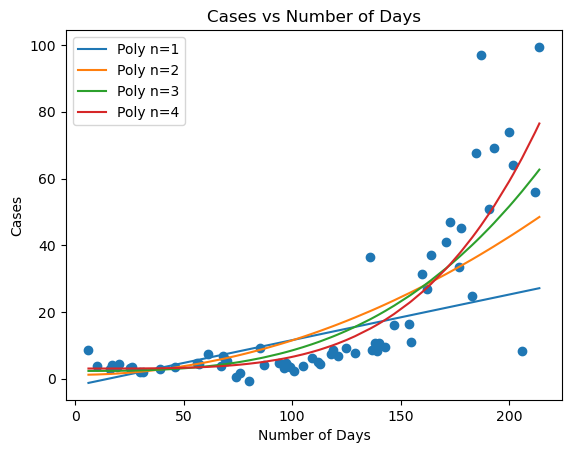

In [34]:
import matplotlib.pyplot as plt



#pridiction variables
y_predN1 = svr_poly1.predict(x_test)
y_predN2 = svr_poly2.predict(x_test)
y_predN3 = svr_poly3.predict(x_test)
y_predN4 = svr_poly4.predict(x_test)

# setting prediction array values to dataframes.
x_testD = pd.DataFrame(x_test, columns=['x_test'])
y_predN1D = pd.DataFrame(y_predN1, columns=['y_predN1'])
y_predN2D = pd.DataFrame(y_predN2, columns=['y_predN2'])
y_predN3D = pd.DataFrame(y_predN3, columns=['y_predN3'])
y_predN4D = pd.DataFrame(y_predN4, columns=['y_predN4'])

# concatinating the prediction arrays with x_test values.
poly1 = pd.concat([x_testD, y_predN1D], axis=1)
poly2 = pd.concat([x_testD, y_predN2D], axis=1)
poly3 = pd.concat([x_testD, y_predN3D], axis=1)
poly4 = pd.concat([x_testD, y_predN4D], axis=1)

# Sorting the values by the predict values.
poly1 = poly1.sort_values(by=['y_predN1'], ascending=True)
poly2 = poly2.sort_values(by=['y_predN2'], ascending=True)
poly3 = poly3.sort_values(by=['y_predN3'], ascending=True)
poly4 = poly4.sort_values(by=['y_predN4'], ascending=True)

# ploting the final values.
plt.scatter(x_test, y_test)
plt.plot(poly1.x_test, poly1.y_predN1, label="Poly n=1")
plt.plot(poly2.x_test, poly2.y_predN2, label="Poly n=2")
plt.plot(poly3.x_test, poly3.y_predN3, label="Poly n=3")
plt.plot(poly4.x_test, poly4.y_predN4, label="Poly n=4")

# The titles and labels
plt.title('Cases vs Number of Days')
plt.xlabel('Number of Days')
plt.ylabel('Cases')

plt.legend()
plt.show()


# Linear and non-linear regression models for deaths

In [35]:
# Setting the x and y values for the models.
# x is number of days.
# y is number of new cases/deaths.
x_deaths = np.array(deaths_MA.Num_of_Days).reshape(-1, 1)
y_deaths = np.array(deaths_MA.Deaths).reshape(-1, 1)

In [36]:
# setting up the training and testing variables based on our x and y values.
xd_train,xd_test,yd_train,yd_test = train_test_split(x_deaths, y_deaths, test_size=0.3, random_state=42)

In [37]:
#SVR training the linear model.
svr_lin_death = SVR(kernel="linear")
svr_lin_death.fit(xd_train, yd_train.ravel())

# SVR training the non-linear model.

svr_poly1_death = SVR(kernel="poly", degree=1)
svr_poly2_death = SVR(kernel="poly", degree=2)
svr_poly3_death = SVR(kernel="poly", degree=3)
svr_poly4_death = SVR(kernel="poly", degree=4)

# Training the non-linear model.
svr_poly1_death.fit(xd_train, yd_train.ravel())
svr_poly2_death.fit(xd_train, yd_train.ravel())
svr_poly3_death.fit(xd_train, yd_train.ravel())
svr_poly4_death.fit(xd_train, yd_train.ravel())

SVR(degree=4, kernel='poly')

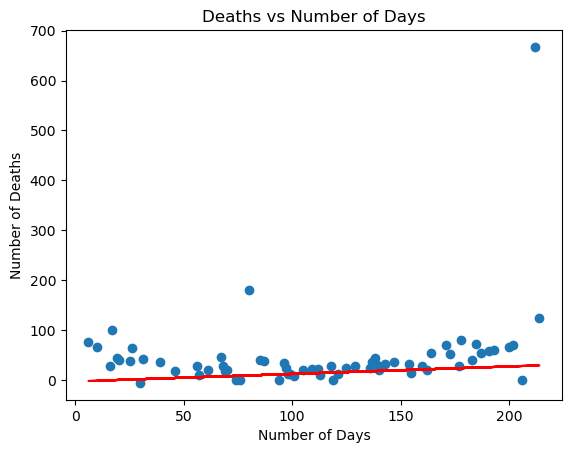

In [38]:
import matplotlib.pyplot as plt

yd_pred = svr_lin.predict(xd_test)

plt.scatter(xd_test, yd_test)
plt.plot(xd_test, yd_pred, color = 'red')
plt.title('Deaths vs Number of Days')
plt.xlabel('Number of Days')
plt.ylabel('Number of Deaths')
plt.show()

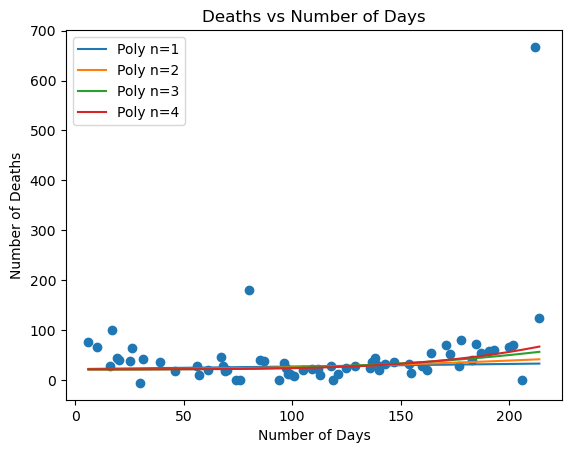

In [39]:

import matplotlib.pyplot as plt


#pridiction variables
yd_predN1 = svr_poly1_death.predict(x_test)
yd_predN2 = svr_poly2_death.predict(x_test)
yd_predN3 = svr_poly3_death.predict(x_test)
yd_predN4 = svr_poly4_death.predict(x_test)

# prediction array values to dataframes.
xd_testD = pd.DataFrame(xd_test, columns=['x_test'])
yd_predN1D = pd.DataFrame(yd_predN1, columns=['y_predN1'])
yd_predN2D = pd.DataFrame(yd_predN2, columns=['y_predN2'])
yd_predN3D = pd.DataFrame(yd_predN3, columns=['y_predN3'])
yd_predN4D = pd.DataFrame(yd_predN4, columns=['y_predN4'])

# concatinating the prediction arrays with x_test values.
poly1d = pd.concat([xd_testD, yd_predN1D], axis=1)
poly2d = pd.concat([xd_testD, yd_predN2D], axis=1)
poly3d = pd.concat([xd_testD, yd_predN3D], axis=1)
poly4d = pd.concat([xd_testD, yd_predN4D], axis=1)

# Sorting the values by the prediction values.
poly1d = poly1d.sort_values(by=['y_predN1'], ascending=True)
poly2d = poly2d.sort_values(by=['y_predN2'], ascending=True)
poly3d = poly3d.sort_values(by=['y_predN3'], ascending=True)
poly4d = poly4d.sort_values(by=['y_predN4'], ascending=True)

# plot the final values.
plt.scatter(xd_test, yd_test)
plt.plot(poly1d.x_test, poly1d.y_predN1, label="Poly n=1")
plt.plot(poly2d.x_test, poly2d.y_predN2, label="Poly n=2")
plt.plot(poly3d.x_test, poly3d.y_predN3, label="Poly n=3")
plt.plot(poly4d.x_test, poly4d.y_predN4, label="Poly n=4")

# the titles and labels
plt.title('Deaths vs Number of Days')
plt.xlabel('Number of Days')
plt.ylabel('Number of Deaths')

plt.legend()
plt.show()


In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

#RMSE values for the models.
# Cases (Linear model)
print("\nLinear Cases Regression model:\n")
c_mse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True)
c_rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
print("- MSE:",c_mse)
print("- RMSE:",c_rmse)

# Cases (Non-Linear model)
print("\nNon-Linear Cases Regression model (n=1 through n=4):\n")
print("- n=1")
cn1_mse = mean_squared_error(y_true=y_test, y_pred=y_predN1, squared=True)
cn1_rmse = mean_squared_error(y_true=y_test, y_pred=y_predN1, squared=False)
print("- MSE:",cn1_mse)
print("- RMSE:",cn1_rmse)

# for n=2
print("\n- n=2")
cn2_mse = mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=True)
cn2_rmse = mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=False)
print("- MSE:",cn2_mse)
print("- RMSE:",cn2_rmse)

# for n=3
print("\n- n=3")
cn3_mse = mean_squared_error(y_true=y_test, y_pred=y_predN3, squared=True)
cn3_rmse = mean_squared_error(y_true=y_test, y_pred=y_predN3, squared=False)
print("- MSE:",cn3_mse)
print("- RMSE:",cn3_rmse)

# for n=4
print("\n- n=4")
cn4_mse = mean_squared_error(y_true=y_test, y_pred=y_predN4, squared=True)
cn4_rmse = mean_squared_error(y_true=y_test, y_pred=y_predN4, squared=False)
print("- MSE:",cn4_mse)
print("- RMSE:",cn4_rmse)

# Deaths (Linear model)
print("\nLinear Deaths Regression model:\n")
d_mse = mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=True)
d_rmse = mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=False)
print("- MSE:",d_mse)
print("- RMSE:",d_rmse)

# Deaths (Non Linear model)
print("\nNon-Linear Deaths Regression model (n=1 through n=4):\n")
print("- n=1")
dn1_mse = mean_squared_error(y_true=yd_test, y_pred=yd_predN1, squared=True)
dn1_rmse = mean_squared_error(y_true=yd_test, y_pred=yd_predN1, squared=False)
print("- MSE:",dn1_mse)
print("- RMSE:",dn1_rmse)

# for n=2
print("\n- n=2")
dn2_mse = mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=True)
dn2_rmse = mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=False)
print("- MSE:",dn2_mse)
print("- RMSE:",dn2_rmse)

# for n=3
print("\n- n=3")
dn3_mse = mean_squared_error(y_true=yd_test, y_pred=yd_predN3, squared=True)
dn3_rmse = mean_squared_error(y_true=yd_test, y_pred=yd_predN3, squared=False)
print("- MSE:",dn3_mse)
print("- RMSE:",dn3_rmse)

# for n=4
print("\n- n=4")
dn4_mse = mean_squared_error(y_true=yd_test, y_pred=yd_predN4, squared=True)
dn4_rmse = mean_squared_error(y_true=yd_test, y_pred=yd_predN4, squared=False)
print("- MSE:",dn4_mse)
print("- RMSE:",dn4_rmse)



Linear Cases Regression model:

- MSE: 356.2390143164199
- RMSE: 18.874295068065983

Non-Linear Cases Regression model (n=1 through n=4):

- n=1
- MSE: 377.634606314199
- RMSE: 19.43282291161526

- n=2
- MSE: 218.98966877289644
- RMSE: 14.798299523016029

- n=3
- MSE: 165.87914168430441
- RMSE: 12.879407660459561

- n=4
- MSE: 150.09082305549035
- RMSE: 12.251155988537993

Linear Deaths Regression model:

- MSE: 7767.270686615374
- RMSE: 88.13212062928801

Non-Linear Deaths Regression model (n=1 through n=4):

- n=1
- MSE: 7210.448767035647
- RMSE: 84.91436137094624

- n=2
- MSE: 218.98966877289644
- RMSE: 14.798299523016029

- n=3
- MSE: 6668.230310772545
- RMSE: 81.65923285687018

- n=4
- MSE: 6459.151572801747
- RMSE: 80.36884702919251


In [41]:
#reshaping the data to get a one-dimensional array.

x_cases = np.array(casesMA_df.Num_of_Days).reshape(-1)
y_cases = np.array(casesMA_df.Cases).reshape(-1) 

In [42]:
# for the trendline using polynomial regression.


zCases = np.polyfit(x_cases, y_cases, 4)
pCases = np.poly1d(zCases)

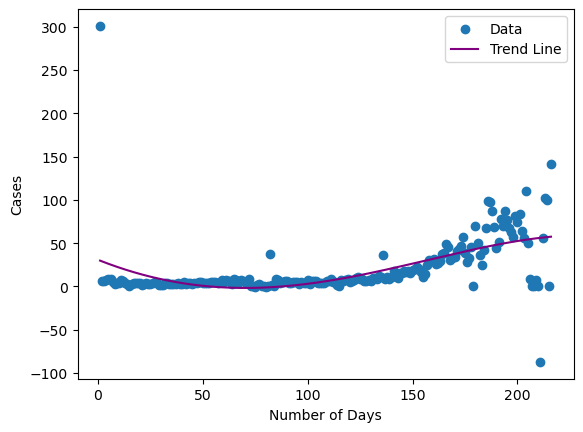

In [45]:
# Plotting the trendline and data before the one week forecast.

plt.scatter(x_cases, y_cases, label="Data")
plt.plot(x_cases, pCases(x_cases), label="Trend Line", color="purple")
plt.xlabel('Number of Days')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [46]:
# Setting up the forecasting model.
# adding seven more days to the specified range of dates.
# extending the trendline for both x and y axis.

numberOfDaysForecastedCases = x_cases[-1] + 7
xForecastedCases = np.arange(x_cases[0], numberOfDaysForecastedCases)

In [47]:
yForecastedCases = pCases(xForecastedCases)

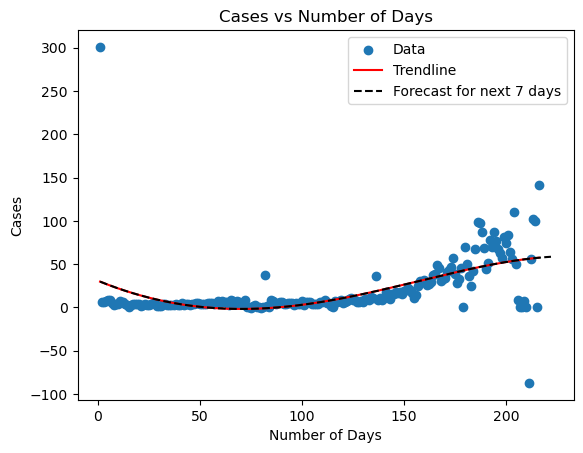

In [48]:
# Displaying the forecast, data and trendline.

plt.scatter(x_cases, y_cases, label="Data")
plt.plot(x_cases, pCases(x_cases), label="Trendline", color="red")
plt.plot(xForecastedCases, yForecastedCases, label="Forecast for next 7 days", linestyle='--', color='black')
plt.title('Cases vs Number of Days')
plt.xlabel('Number of Days')
plt.ylabel('Cases')
plt.legend()
plt.show()

Deaths Trendline and Forecast

In [49]:
# Followed same steps with the Cases with n = 2 for polynomial regression.
# Reshape the data into a one-dimensional array.
x_deaths = np.array(deaths_MA.Num_of_Days).reshape(-1)
y_deaths = np.array(deaths_MA.Deaths).reshape(-1) 

In [50]:
# The trendline using polynomial regression.

zDeaths = np.polyfit(x_deaths, y_deaths, 2)
pDeaths = np.poly1d(zDeaths)

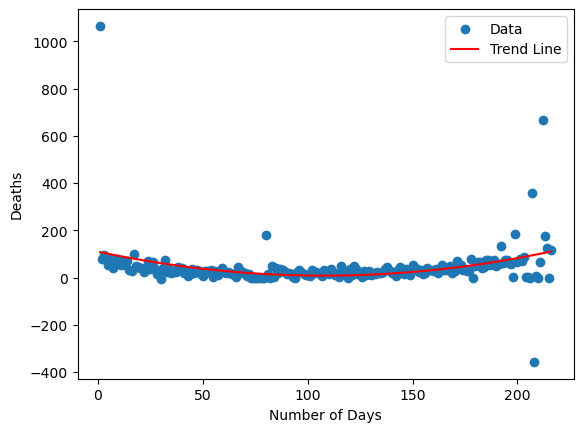

In [51]:
# Plotting the trendline and data before the one week further forecast.

plt.scatter(x_deaths, y_deaths, label="Data")
plt.plot(x_deaths, pDeaths(x_deaths), label="Trend Line", color="red")
plt.xlabel('Number of Days')
plt.ylabel('Deaths')
plt.legend()
plt.show()

In [52]:
# Setting up the forecasting model.
# adding seven more days to the specified range of dates.
# extending the trendline for both x and y axis.

numberOfDaysForecastedDeaths = x_deaths[-1] + 7
xForecastedDeaths = np.arange(x_deaths[0], numberOfDaysForecastedDeaths)

In [53]:
yForecastedDeaths = pDeaths(xForecastedDeaths)

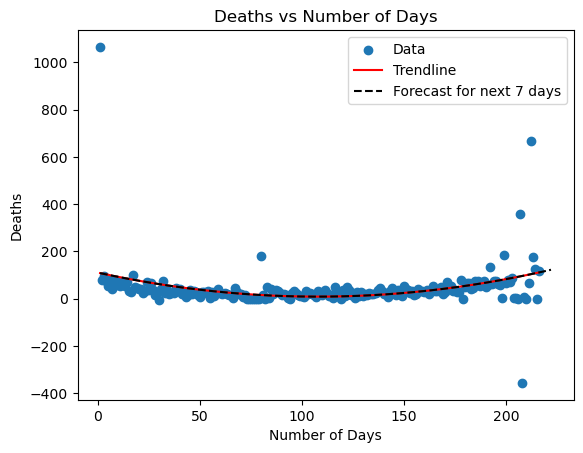

In [54]:
# Displaying the forecast, data and trendline.

plt.scatter(x_deaths, y_deaths, label="Data")
plt.plot(x_deaths, pDeaths(x_deaths), label="Trendline", color="red")
plt.plot(xForecastedDeaths, yForecastedDeaths, label="Forecast for next 7 days", linestyle='--', color='black')
plt.title('Deaths vs Number of Days')
plt.xlabel('Number of Days')
plt.ylabel('Deaths')
plt.legend()
plt.show()

# Confidence Intervals

In [60]:
import numpy as np
from scipy import stats

df = casesMA_df

confidence_level = 0.95

mean = np.mean(df)
sem = stats.sem(df)


margin_of_error = stats.t.ppf((1 + confilevel) / 2, len(df) - 1) * sem


confidence_interval = (mean - margin_of_error, mean + margin_of_error)


print(f"Mean: {mean}")
print(f"Confidence Interval: {confidence_interval}")

Mean: Cases           19.432211
Num_of_Days    108.500000
dtype: float64
Confidence Interval: (Cases           15.033576
Num_of_Days    100.118169
dtype: float64, Cases           23.830846
Num_of_Days    116.881831
dtype: float64)


C:\Users\mawul\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [59]:
import numpy as np
from scipy import stats

df1 = deaths_MA

confidence_level = 0.95

mean = np.mean(df1)
sem = stats.sem(df1)


margin_of_error = stats.t.ppf((1 + confilevel) / 2, len(df) - 1) * sem


confidence_interval = (mean - margin_of_error, mean + margin_of_error)


print(f"Mean: {mean}")
print(f"Confidence Interval: {confidence_interval}")

Mean: Deaths          42.155303
Num_of_Days    108.500000
dtype: float64
Confidence Interval: (Deaths          29.553422
Num_of_Days    100.118169
dtype: float64, Deaths          54.757185
Num_of_Days    116.881831
dtype: float64)


C:\Users\mawul\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
